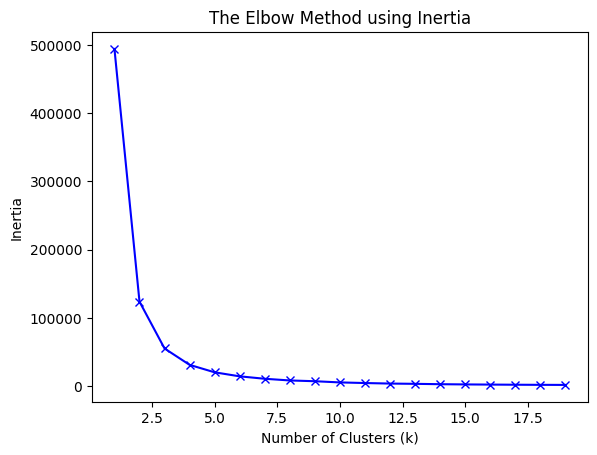

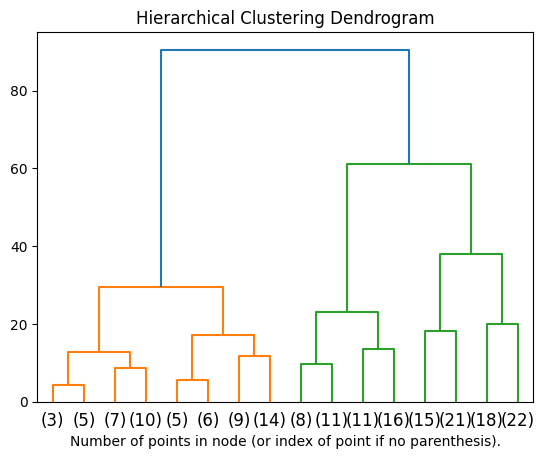

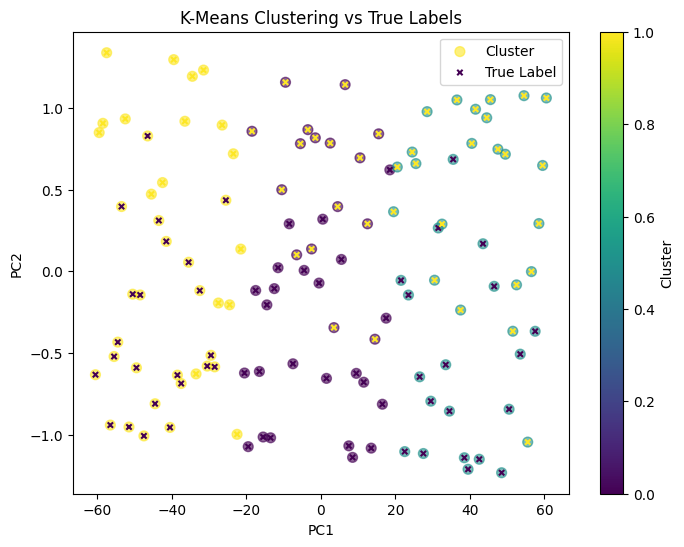

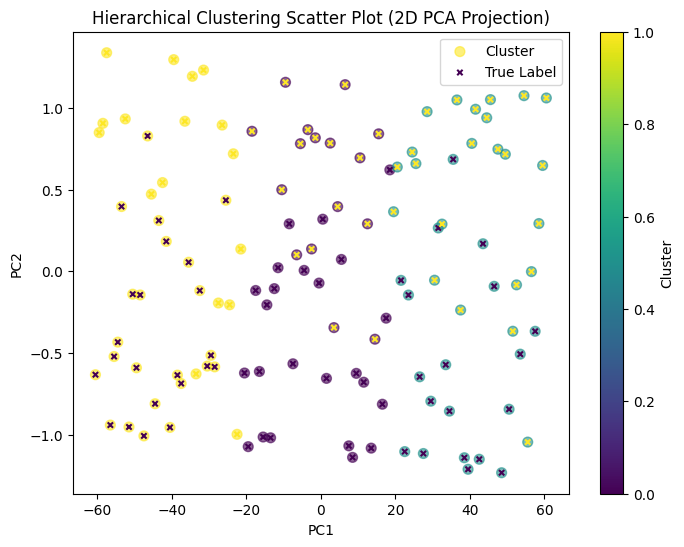

['../models/finalunsupervised_model.pkl']

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from src.utils import Get_K, plot_dendrogram
import joblib
# Load reduced features
X_train_reduc = pd.read_csv("../data/X_train_reduc.csv")
X_test_reduc = pd.read_csv("../data/X_test_reduc.csv")
y_test = pd.read_csv("../data/y_test.csv").values


#Unsupervised Learning Techniques
get_opt_k = Get_K(X_train_reduc, 20)
get_opt_k.elbow()
k = 3

k_means = KMeans(n_clusters= k, random_state=42)
k_means.fit(X_test_reduc)
hierarchical = AgglomerativeClustering(n_clusters=k, metric= 'euclidean', linkage ='average', compute_distances=True)
hierarchical.fit(X_train_reduc)

# plot the top three levels of the dendrogram
plot_dendrogram(hierarchical, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Reduce X_test_reduc to 2D for visualization
pca_2d = PCA(n_components=2)
X_test_2d = pca_2d.fit_transform(X_test_reduc)

# Scatter plot for K-Means clusters overlayed with true labels 
plt.figure(figsize=(8,6))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=k_means.labels_, cmap='viridis', s=50, marker ='o', alpha=0.6, label="Cluster")
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='viridis', s=15, marker='x', label="True Label")
plt.title("K-Means Clustering vs True Labels")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.colorbar(label="Cluster")
plt.show()


# Scatter plot for Hierarchical clusters overlayed with true labels
X_train_2d = pca_2d.fit_transform(X_train_reduc)

plt.figure(figsize=(8,6))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=k_means.labels_, cmap='viridis', s=50, marker ='o', alpha=0.6, label="Cluster")
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='viridis', s=15, marker='x', label="True Label")
plt.title("Hierarchical Clustering Scatter Plot (2D PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.colorbar(label="Cluster")
plt.show()
joblib.dump(k_means, "../models/finalunsupervised_model.pkl")
